In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [44]:
df=pd.read_csv('../data/customer_segmentation.csv')

In [45]:
df.shape

(2240, 29)

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)

In [8]:
df['Age'] = 2025 - df['Year_Birth']

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [10]:
df['totat_amount'] = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)

In [11]:
df.drop(columns=['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds'],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   NumDealsPurchases    2216 non-null   int64         
 10  NumWebPurchases      2216 non-null   int64         
 11  NumCatalogPurchases  2216 non-null   int64         
 12  NumStorePurchases    2216 non-null   int64         
 13  NumWebVisitsMonth    2216 non-null   i

<Axes: xlabel='totat_amount', ylabel='Count'>

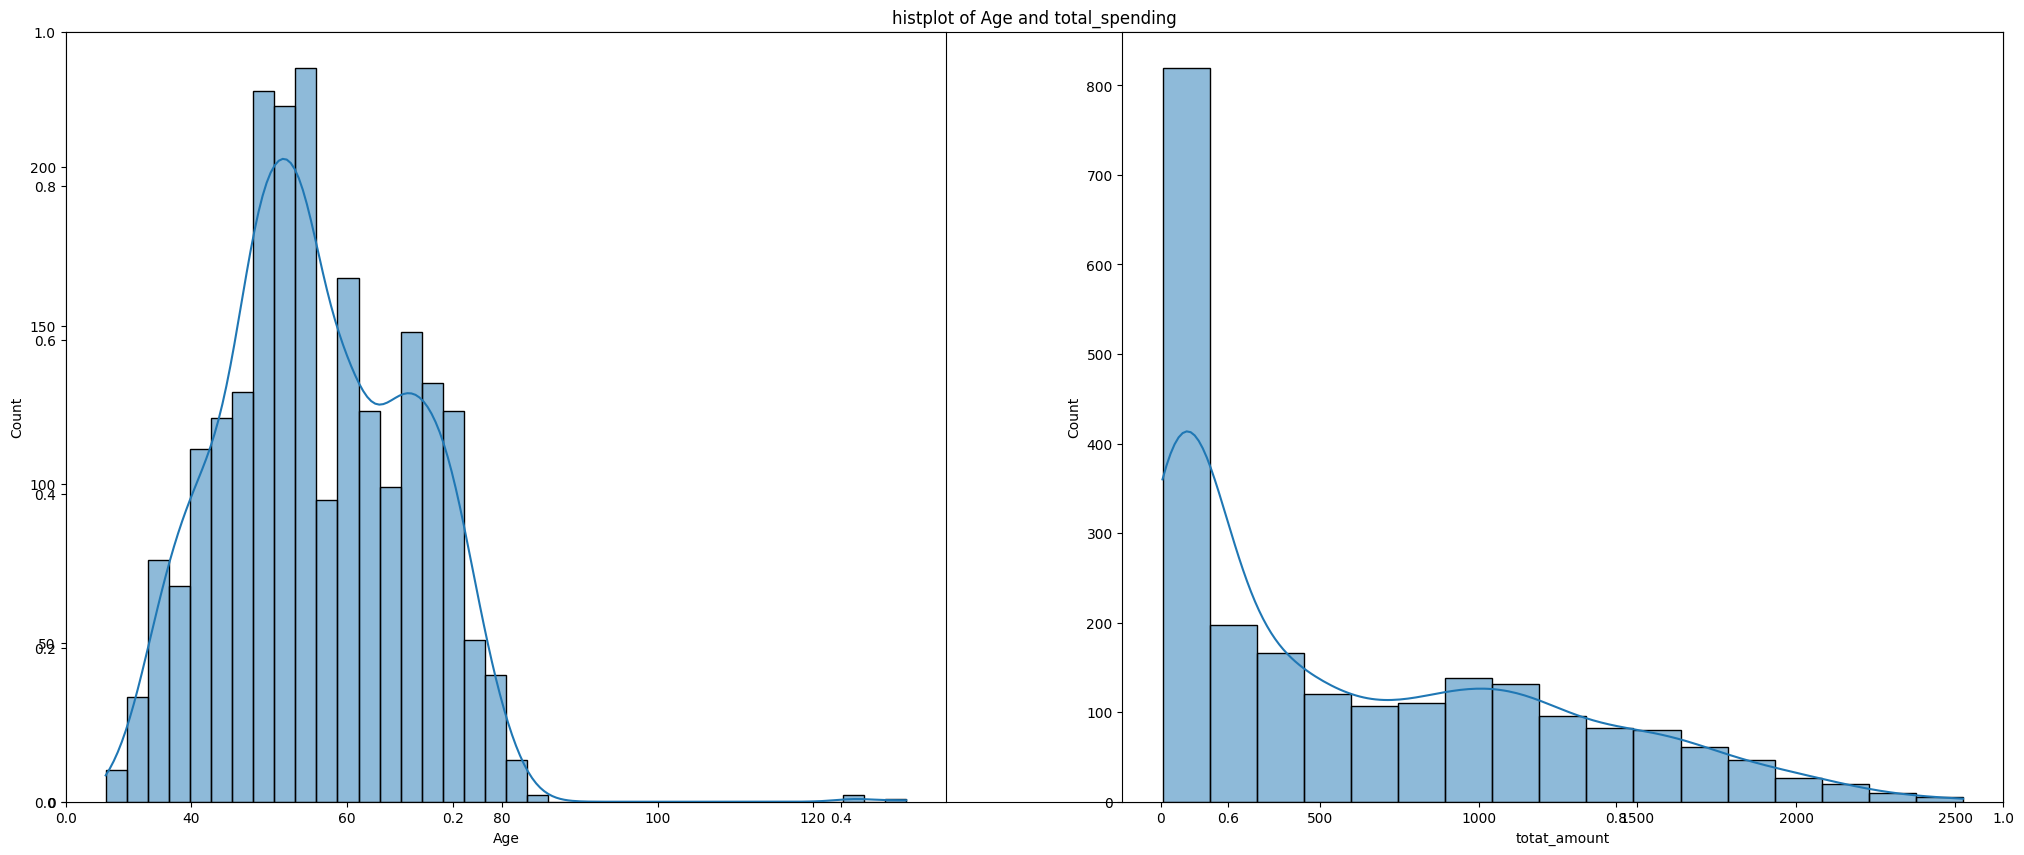

In [13]:
plt.figure(figsize=(25,10))
plt.title('histplot of Age and total_spending')

plt.subplot(121)
sns.histplot(data=df,x='Age',kde=True)

plt.subplot(122)
sns.histplot(data=df,x='totat_amount',kde=True)

<Axes: title={'center': 'Eduction vs income'}, xlabel='Education', ylabel='Income'>

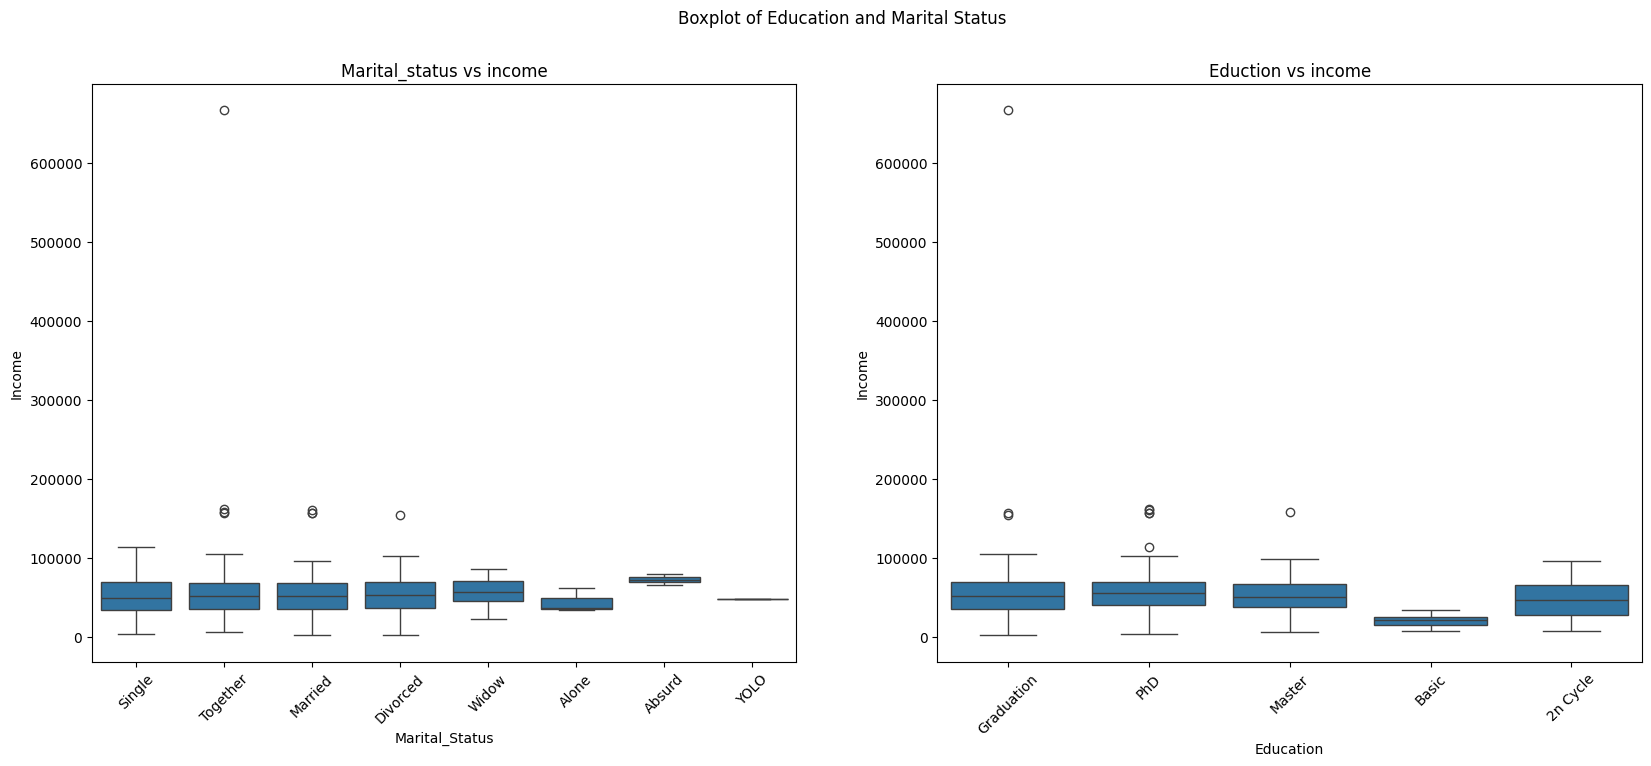

In [14]:
plt.figure(figsize=(20,7.5))
plt.suptitle('Boxplot of Education and Marital Status')

plt.subplot(121)
plt.title('Marital_status vs income')
plt.xticks(rotation=45)
sns.boxplot(data=df,x='Marital_Status',y='Income')

plt.subplot(122)
plt.title('Eduction vs income')
plt.xticks(rotation=45)
sns.boxplot(data=df,x='Education',y='Income')

In [15]:
label = ['18-29','30-39','40-49','50-59','60-69','70+']
bins = [18,30,40,50,60,70,80]

In [16]:
df['Age_grp'] = pd.cut(df['Age'],bins=bins,labels=label)

df['Age_grp']

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: Age_grp, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

## Unsupervised and supervised learning

In [17]:
!pip install xgboost

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
import xgboost as xgb

In [19]:
X = df[['Age', 'Income', 'totat_amount', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Recency']]

In [20]:
pca = PCA()

X_scaled = pca.fit_transform(X)

In [21]:
df_new = pd.DataFrame(X_scaled,columns=[f'PC{i+1}' for i in range(X_scaled.shape[1])])

df_new

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,5906.146486,915.603274,7.298119,11.079616,-1.398012,-5.948775,-0.490451
1,-5911.771965,-485.628990,-9.945524,15.396286,-3.103102,-0.058884,-0.292199
2,19365.974420,-140.814136,-22.634376,2.657444,4.357961,1.328151,-1.028012
3,-25606.839296,-144.647460,-22.950583,-12.989835,-0.245811,1.103820,-0.258573
4,6042.014775,-281.643034,45.462885,-12.925049,1.668751,0.199247,-0.821439
...,...,...,...,...,...,...,...
2211,8986.337715,590.284884,-4.129616,1.061591,-0.098796,-4.590939,-2.825808
2212,11762.637799,-351.201964,7.909379,21.982130,2.858507,-3.203110,-0.805348
2213,4743.280010,558.233917,40.795778,-13.013781,1.327660,3.995312,4.782349
2214,16999.349427,-35.991990,-40.770939,11.925805,2.169984,2.588760,-0.530335


In [22]:
num = Pipeline(steps=[
    ('nums',StandardScaler())
])

In [23]:
X = df_new
y=df['Response']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
preprocessor = Pipeline(steps=[
    ('numerical',num,X.columns)
])

In [25]:
# Correct pipeline definition
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standard scaling
    ('model', DecisionTreeClassifier())  # Step 2: Decision Tree
])

In [26]:
pipe.fit(X_train,y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [27]:
y_pred = pipe.predict(X_test)

print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('\nclassification_report:\n',classification_report(y_test,y_pred))

accuracy_score:  0.8220720720720721

classification_report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       382
           1       0.39      0.47      0.42        62

    accuracy                           0.82       444
   macro avg       0.65      0.67      0.66       444
weighted avg       0.84      0.82      0.83       444



In [28]:
# Define the parameter grid to search
param_grid = {
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model__max_depth': [3, 5, ...], 'model__min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [29]:
y_pred = grid_search.predict(X_test)

print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('classification_report:\n',classification_report(y_test,y_pred))

accuracy_score:  0.8490990990990991
classification_report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       382
           1       0.44      0.32      0.37        62

    accuracy                           0.85       444
   macro avg       0.67      0.63      0.64       444
weighted avg       0.83      0.85      0.84       444



In [30]:
# Create and train the model
model_xgboost = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model_xgboost.fit(X_train, y_train)


c:\Users\Omkar\.conda\envs\myenv\lib\site-packages\xgboost\training.py:199: UserWarning: [15:51:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [31]:
# Predictions
y_pred = model_xgboost.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8828828828828829
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       382
           1       0.61      0.44      0.51        62

    accuracy                           0.88       444
   macro avg       0.76      0.70      0.72       444
weighted avg       0.87      0.88      0.87       444



In [32]:
import joblib
import os

os.makedirs("model", exist_ok=True)

# Save the trained pipeline or model
joblib.dump(model_xgboost, "../model/xgboost_pipeline.pkl")

print("✅ Pipeline saved at: model/xgboost_pipeline.pkl")

✅ Pipeline saved at: model/xgboost_pipeline.pkl


In [33]:
# Kmean clusteering
from sklearn.cluster import KMeans

In [34]:
wcss = []

for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

c:\Users\Omkar\.conda\envs\myenv\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [35]:
wcss

[674714078195.9058,
 529072845410.71716,
 183341961917.72147,
 136573707454.11023,
 81127337812.57478,
 53647194583.70698,
 40635631030.5547,
 31261556411.384834]

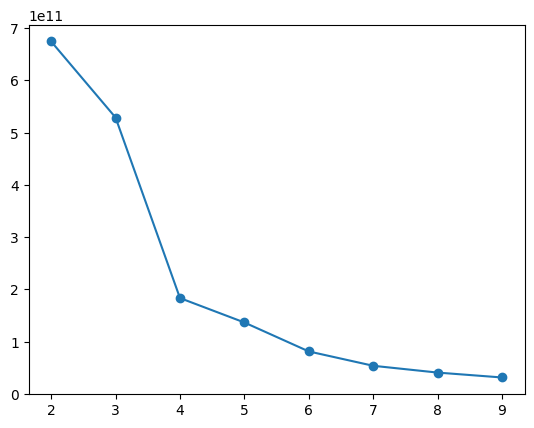

In [36]:
plt.plot(range(2,10),wcss,marker="o")

In [37]:
kmeans = KMeans(n_clusters=4)
df['Clustering'] = kmeans.fit_predict(X_scaled)

In [38]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,totat_amount,Age_grp,Clustering
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,3,...,0,0,0,3,11,1,68,1617,60-69,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,2,...,0,0,0,3,11,0,71,27,70+,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,1,...,0,0,0,3,11,0,60,776,50-59,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,2,...,0,0,0,3,11,0,41,53,40-49,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,5,...,0,0,0,3,11,0,44,422,40-49,0


In [39]:
df['Clustering'].value_counts()

Clustering
0    788
3    739
1    688
2      1
Name: count, dtype: int64

In [40]:
pd.DataFrame(df[df['Clustering'] == 1][['Age','Education','Marital_Status','Income','totat_amount']])

,Age,Education,Marital_Status,Income,totat_amount
2,60,Graduation,Together,71613.0,776
15,79,PhD,Single,82800.0,1315
18,76,Master,Married,76995.0,1782
23,71,PhD,Married,65324.0,544
29,60,PhD,Married,84618.0,1672
...,...,...,...,...,...
2211,44,Graduation,Together,88325.0,1623
2213,30,2n Cycle,Single,80617.0,1435
2217,77,PhD,Widow,82032.0,1234
2221,43,Master,Single,75777.0,1438


In [41]:
import joblib
import os

os.makedirs("model", exist_ok=True)

# Save the trained pipeline or model
joblib.dump(kmeans, "../model/kmeans_clustering.pkl")

print("✅ Pipeline saved at: model/kmeans_clustering.pkl")

✅ Pipeline saved at: model/kmeans_clustering.pkl
